In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv(R"data/train/.csv")
df = df_train

Need to fi

In [33]:
def rle_decode(mask_rle, shape=(520, 704, 1), color=1):  # function to convert tabular mask data to image
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height, width, channels) of array to return 
    color: color for the mask
    Returns numpy array (mask)

    '''
    s = mask_rle.split()
    
    starts = list(map(lambda x: int(x) - 1, s[0::2]))
    lengths = list(map(int, s[1::2]))
    ends = [x + y for x, y in zip(starts, lengths)]
    
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
            
    for start, end in zip(starts, ends):
        img[start : end] = color
    
    return img.reshape(shape)  # Gives a new shape to an array without changing its data

In [8]:
import cv2

In [28]:
def plot_masks(image_id, colors=True):  # mask inference function
    # at the input of the function, we indicate the number of the image and whether to display the mask in color (colors=True) or  (colors=False)
    labels = df_train[df_train["id"] == image_id]["annotation"].tolist()  # by the image number, we take all the value in the column "annotation" which contain all the data on our mask

    if colors:  # (colors=True)
        mask = np.zeros((520, 704, 3))  # Return a new array of given shape and type, filled with zeros. Set the size and color scheme in rgb
        for label in labels:  # we go through all the data by masks (in the column "annotation")
            mask += rle_decode(label, shape=(520, 704, 3), color=np.random.rand(3))  # create an array of our masks processed function rle_decode
    else:  # (colors=False)
        mask = np.zeros((520, 704, 1))  # Return a new array of given shape and type, filled with zeros. Set the size and color scheme in one color
        for label in labels:  # we go through all the data by masks (in the column "annotation")
            mask += rle_decode(label, shape=(520, 704, 1))  # create an array of our masks processed function rle_decode
    mask = mask.clip(0, 1)  # Clip (limit) the values in an array. Given an interval, values outside the interval are clipped to the interval edges. 
    # if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.

    image = cv2.imread(f"data/train/{image_id}.png")  # read the original image 
    # (reads as a NumPy array of row (height) x column (width) x color (3) The order of color is BGR (blue, green, red).)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR is converted to RGB

    plt.figure(figsize=(16, 32))  
        # original image with semi-transparent mask


  
    plt.subplot(3, 1, 2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)    
    plt.axis("off")
    
#     # image only mask
#     plt.subplot(3, 1, 3)
#     plt.imshow(mask)    
#     plt.axis("off")# determine the dimensions of our output image

e92c56871769


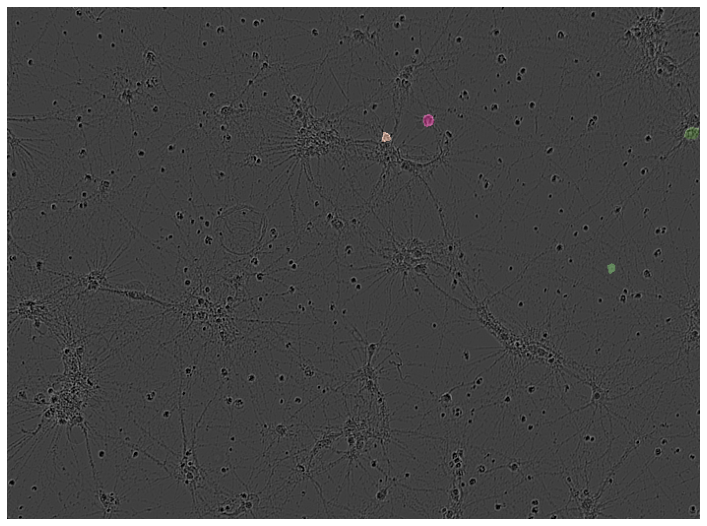

In [29]:
min_label = df_train["id"].value_counts().idxmin()
print(min_label)
plot_masks(min_label)





In [73]:
samp = df.sample(1)["annotation"].tolist()[0]
decoded = rle_decode(samp)

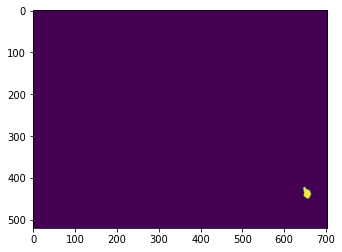

In [79]:
plt.imshow(decoded)

array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)

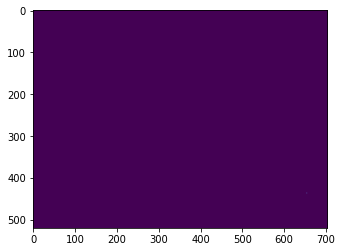

In [94]:
nonzero = decoded.nonzero()
centroid = (round(nonzero[0].mean()), round(nonzero[1].mean()))
mask = np.zeros_like(decoded)
mask[centroid] = 1

mask